# System Demo
This notebook provides a small interactive demo that: (1) locates the project's `evaluation_results.json`, (2) shows sample retrieval and generation metrics, and (3) gives a starting point for calling the library from a notebook.

Run cells in order. If `evaluation_results.json` is missing, run `python src/evaluation.py` from the project root to generate it.

In [1]:
# Cell 2: utilities and imports
from pathlib import Path
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
def find_file_upwards(filename: str, start: Path = Path.cwd(), max_depth: int = 6) -> Path | None:
    p = start
    for _ in range(max_depth + 1):
        candidate = p / filename
        if candidate.exists():
            return candidate
        if p.parent == p:
            break
        p = p.parent
    return None
# Try to locate the evaluation results file
RESULTS_FILE = find_file_upwards('evaluation_results.json', start=Path.cwd(), max_depth=6)
if RESULTS_FILE is None:
    raise FileNotFoundError('evaluation_results.json not found. Run src/evaluation.py from the project root to generate it.')
print('Using results file:', RESULTS_FILE)
with open(RESULTS_FILE, 'r', encoding='utf-8') as f:
    results = json.load(f)
# Prepare retrieval and generation dataframes
retrieval = results.get('retrieval', {})
retrieval_rows = []
for k_key, metrics in retrieval.items():
    try:
        k = int(k_key.split('=')[-1])
    except Exception:
        k = None
    retrieval_rows.append({'k': k, 'avg_recall': metrics.get('avg_recall', 0), 'avg_precision': metrics.get('avg_precision', 0), 'avg_mrr': metrics.get('avg_mrr', 0), 'num_queries': metrics.get('num_queries', 0)})
retrieval_df = pd.DataFrame(retrieval_rows).sort_values('k') if retrieval_rows else pd.DataFrame()
generation = results.get('generation', [])
gen_df = pd.DataFrame(generation) if generation else pd.DataFrame()

Using results file: c:\Users\ramse\source\repos\regression-scholar\evaluation_results.json


,k,avg_recall,avg_precision,avg_mrr,num_queries
0,3,0.244444,0.266667,0.500000,15
1,5,0.368889,0.226667,0.546667,15
2,10,0.456667,0.173333,0.564524,15


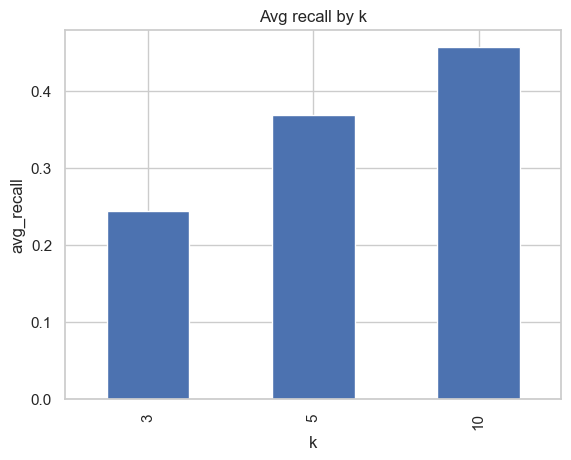

In [2]:
# Cell 3: show retrieval summary
if not retrieval_df.empty:
    display(retrieval_df)
    ax = retrieval_df.set_index('k')['avg_recall'].plot(kind='bar', title='Avg recall by k')
    ax.set_xlabel('k')
    ax.set_ylabel('avg_recall')
    plt.show()
else:
    print('No retrieval results found in the file.')

,question,concept_coverage,concepts_found,concepts_missing,has_citations,word_count,is_substantial,answer_preview,question_id,category,num_sources
0,What is ridge regression?,0.666667,"[regularization, shrinkage]",[L2 penalty],True,1068,True,Ridge regression is a statistical technique th...,1,definition,5
1,Compare ridge and LASSO,0.666667,"[variable selection, sparsity]",[L1 vs L2],True,1090,True,Ridge and LASSO (Least Absolute Shrinkage and ...,2,comparison,5
2,What is the bias-variance tradeoff?,1.000000,"[bias, variance, model complexity, regularizat...",[],True,726,True,The bias-variance tradeoff describes a fundame...,3,concept,5
3,When should I use LASSO vs ridge regression?,0.333333,[collinearity],"[sparsity assumption, feature selection]",True,1691,True,When deciding between LASSO (Least Absolute Sh...,4,application,5
4,What is elastic net regression?,0.666667,"[combination, regularization]",[L1 and L2 penalty],True,904,True,Elastic Net regression is a regularization tec...,5,definition,5


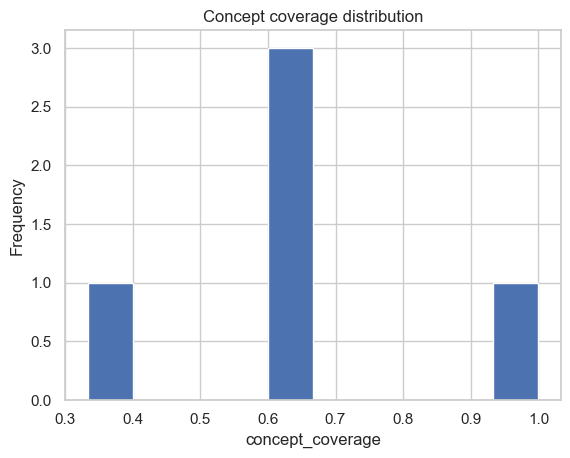

In [3]:
# Cell 4: show generation examples (if present)
if not gen_df.empty:
    display(gen_df.head(10))
    if 'concept_coverage' in gen_df.columns:
        ax2 = gen_df['concept_coverage'].plot(kind='hist', bins=10, title='Concept coverage distribution')
        ax2.set_xlabel('concept_coverage')
        plt.show()
else:
    print('No generation results found in the file.')

## Next steps
- To call the library from this notebook, import project modules (for example: `from src.generation import ScholarAI`) and instantiate with your API key available in environment variables.
- To run the full evaluation, run `python src/evaluation.py` from the project root.